# 머신러닝의 난제

> 우리가 머신러닝 기법을 통해 학습 데이터로부터 모델 학습을 완료하면, 실제 현장의 데이터를 입력해 사용합니다. 학습된 모델에 실제 데이터를 입력해 결과를 찾는 것을 '추론(inference)'이라고 합니다.  
  
> 이렇게 학습 데이터로 열심히 모델을 학습해도, 실제 데이터를 입력하니 제대로 작동하지 않을 수 있습니다. 그 이유는 학습 데이터는 실제 데이터의 부분집합이기 때문에 모든 상황에 맞는 모델 학습을 할 수 없기 때문입니다. 머신러닝의 모든 문제는 여기서 발생한다고 볼 수 있습니다.  

> 따라서 머신러닝 기법을 사용할 때는 실제 데이터의 특성이 잘 반영되어 있고 편향되지 않은 학습 데이터를 확보하는 것이 아주 중요합니다. 학습 데이터와 실제 데이터가 달라져도 성능 차이가 나지 않게 하는 것 '일반화(generalization)'라고 한다. 
  
하기 과적합과 과소적합이 대표적인 일반화를 떨어뜨리는 주범 중에 하나입니다.

## 일반화(generalization)
- 테스트 데이터에서 만들어내는 오차를 일반화 오차라 부른다.
- 훈련 데이터에서와 같이 테스트 데이터에서도 좋은 성능을 내는 모델은 일반화가 잘 된 모델이라고 부른다.
- 모델이 너무 훈련 데이터에 과하게 학습을 하지 않도록 하는 많은 일반화 방법들이 존재한다.

# 과적합(Overfitting)/과소적합(Underfitting)

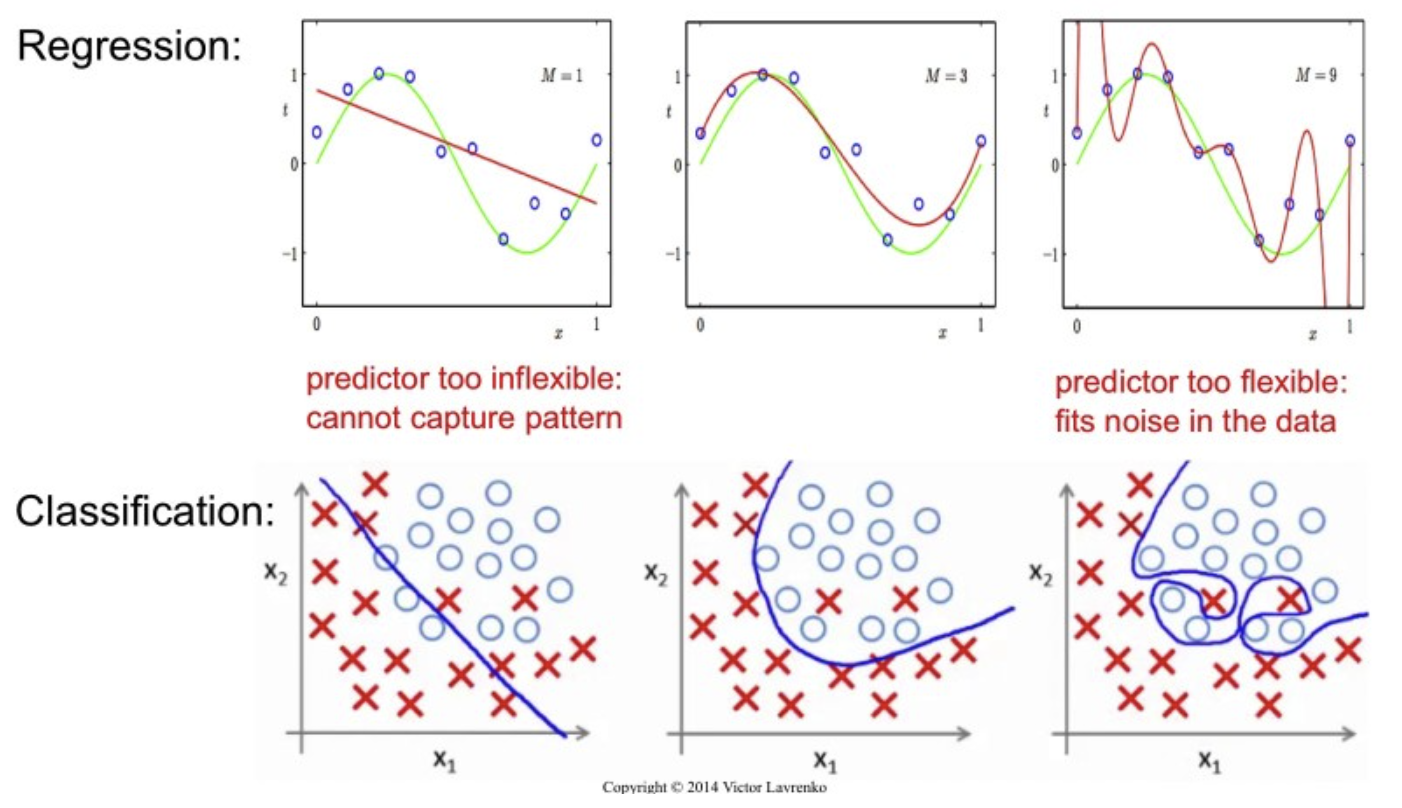

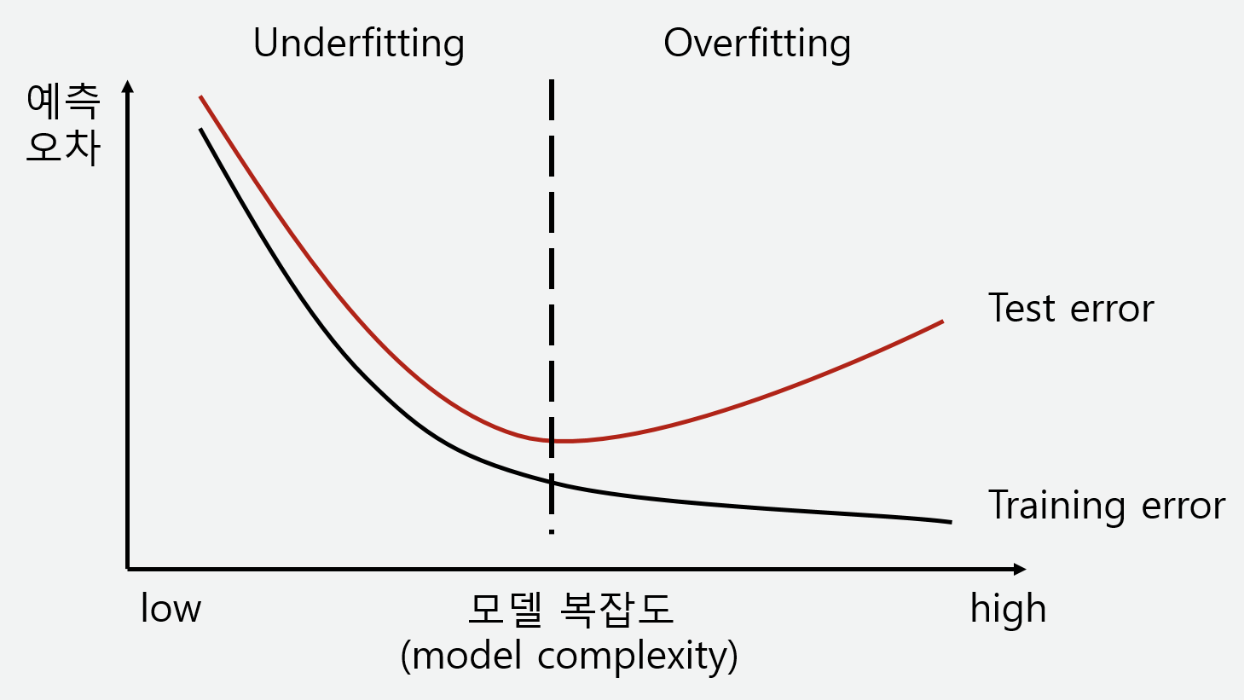

## 과대적합(overfitting)
  - 모델이 학습데이터에 필요 이상으로 적합
  - 데이터 내의 존재하는 규칙뿐만 아니라 불완전한 샘플도 학습

## 과소적합(underfitting)
  - 모델이 학습데이터에 제대로 적합하지 못함
  - 데이터 내에 존재하는 규칙도 제대로 학습 못함.

# 예제

In [1]:
import seaborn as sns

df = sns.load_dataset('titanic')

In [2]:
cols = ["age","sibsp","parch","fare"]
features = df[cols]
target = df["survived"]

In [3]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

cols = ["pclass","sex","embarked"]
enc = OneHotEncoder()
tmp = pd.DataFrame(
    enc.fit_transform(df[cols]).toarray(),
    columns = enc.get_feature_names_out()
)
tmp
features = pd.concat([features,tmp],axis=1)
features.head()

,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,embarked_nan
0,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,38.0,1,0,71.2833,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,26.0,0,0,7.9250,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,35.0,1,0,53.1000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [4]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [ ]:
features.age = features.age.fillna(-1)
features.isnull().sum().sum()

0

In [ ]:
from sklearn.model_selection import train_test_split
SEED=42

x_train,x_valid, y_train,y_valid= train_test_split(features,target,random_state=SEED,test_size=0.2)

x_train.shape,x_valid.shape, y_train.shape,y_valid.shape

((712, 13), (179, 13), (712,), (179,))

## 모델 복잡도에 따른 overfitting 예제

In [ ]:
from sklearn.tree import DecisionTreeClassifier
SEED = 42

model = DecisionTreeClassifier(max_depth=20,random_state=SEED)


model.fit(x_train,y_train)



model.score(x_train,y_train) , model.score(x_valid,y_valid)

(0.9803370786516854, 0.770949720670391)

## 모델 복잡도를 줄인 예제

In [ ]:
model = DecisionTreeClassifier(max_depth=3,random_state=SEED)
model.fit(x_train,y_train)
model.score(x_train,y_train) , model.score(x_valid,y_valid)

(0.8146067415730337, 0.7932960893854749)